<a href="https://colab.research.google.com/github/AnLiMan/RNN/blob/main/RNN_2_v_0_1_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение гугл диска

In [47]:
from google.colab import drive
drive.mount('/content/drive')
number_of_interations = 5
Adjusting_the_prediction_result = 0 # Подстройка результата предсказания, спользуется для более точного подгона нейросети
print('Текущий номер для сохранения модели, чекпоинтов, а также загрузки существующей модели с облака: ', number_of_interations)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Текущий номер для сохранения модели, чекпоинтов, а также загрузки существующей модели с облака:  5


Библиотеки

In [48]:
from pandas import read_csv
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, Masking, Embedding
from sklearn.preprocessing import MinMaxScaler

Keras SimpleRNN
The function below returns a model that includes a SimpleRNN layer and a Dense layer for learning sequential data. The input_shape specifies the parameter (time_steps x features). We’ll simplify everything and use univariate data, i.e., one feature only; the time_steps are discussed below.

In [49]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation = activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    # Dropout for regularization
    #model.add(Dropout(0.5))

    model.compile(loss='mean_squared_error', optimizer="sgd", metrics=["accuracy"])

    #model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
    return model

demo_model = create_RNN(128, 1, (3,1), activation=['relu', 'softmax'])
demo_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 128)               16640     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

dataset_url = 'https://raw.githubusercontent.com/AnLiMan/RNN/main/Datasets/TestDataset9.csv' 
train_data, test_data, data = get_train_test(dataset_url)

In [61]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 4
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [69]:
model = create_RNN(hidden_units=128, dense_units=1, input_shape=(time_steps,1), activation=['linear', 'linear'])
model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=2, shuffle = True)
model.summary()

# Сохраним всю модель в  HDF5 файл
model.save("/content/drive/My Drive/Files for colab/RNN_Model" + str(number_of_interations) + ".h5")

Epoch 1/20
20/20 - 1s - loss: 0.2024 - accuracy: 0.0256 - 874ms/epoch - 44ms/step
Epoch 2/20
20/20 - 0s - loss: 0.0633 - accuracy: 0.0256 - 42ms/epoch - 2ms/step
Epoch 3/20
20/20 - 0s - loss: 0.0235 - accuracy: 0.0256 - 43ms/epoch - 2ms/step
Epoch 4/20
20/20 - 0s - loss: 0.0073 - accuracy: 0.0256 - 45ms/epoch - 2ms/step
Epoch 5/20
20/20 - 0s - loss: 0.0021 - accuracy: 0.0256 - 43ms/epoch - 2ms/step
Epoch 6/20
20/20 - 0s - loss: 6.5635e-04 - accuracy: 0.0256 - 43ms/epoch - 2ms/step
Epoch 7/20
20/20 - 0s - loss: 1.7049e-04 - accuracy: 0.0256 - 45ms/epoch - 2ms/step
Epoch 8/20
20/20 - 0s - loss: 6.6994e-05 - accuracy: 0.0256 - 44ms/epoch - 2ms/step
Epoch 9/20
20/20 - 0s - loss: 2.1016e-05 - accuracy: 0.0256 - 52ms/epoch - 3ms/step
Epoch 10/20
20/20 - 0s - loss: 8.4914e-06 - accuracy: 0.0256 - 43ms/epoch - 2ms/step
Epoch 11/20
20/20 - 0s - loss: 4.6606e-06 - accuracy: 0.0256 - 47ms/epoch - 2ms/step
Epoch 12/20
20/20 - 0s - loss: 3.5951e-06 - accuracy: 0.0256 - 60ms/epoch - 3ms/step
Epoch 1

In [70]:
# Восстановим в точности ту же модель, включая веса и оптимизатор

Loading_model = keras.models.load_model("/content/drive/My Drive/Files for colab/RNN_Model" + str(number_of_interations) + ".h5")
Loading_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, 128)               16640     
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [71]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = Loading_model.predict(trainX) + Adjusting_the_prediction_result
test_predict = Loading_model.predict(testX) + Adjusting_the_prediction_result
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.002 RMSE
Test RMSE: 0.001 RMSE


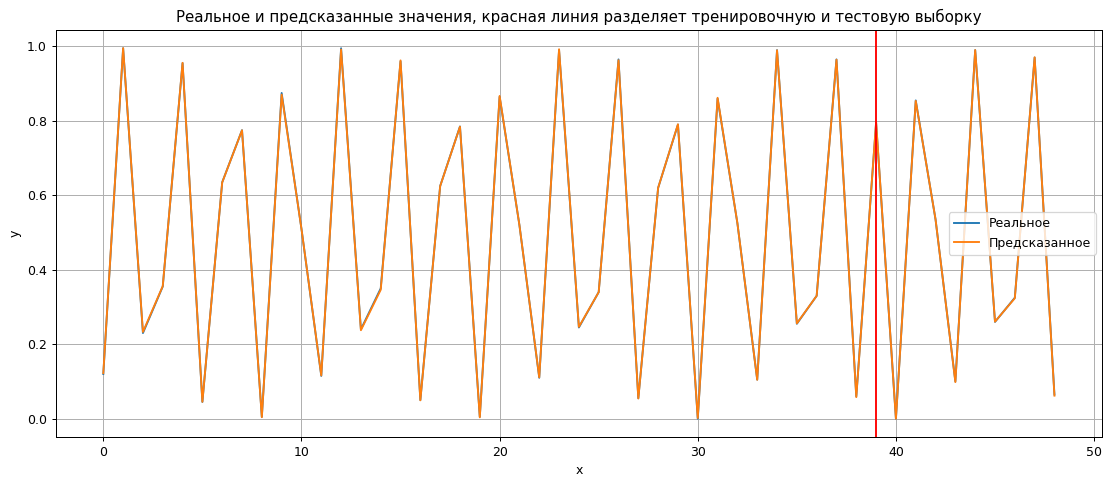

In [72]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=90)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Реальное', 'Предсказанное'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Реальное и предсказанные значения, красная линия разделяет тренировочную и тестовую выборку')
    plt.grid()
plot_result(trainY, testY, train_predict, test_predict)